In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.sparse as sp
import pickle, time, os
from scipy.special import logsumexp
from copy import deepcopy

In [4]:
import numpy as np

# ----- geometry (your original parameters, generalized a bit) -----
a1 = np.array([3, np.sqrt(3)])/2
a2 = np.array([3, -np.sqrt(3)])/2
basis = [np.array([0.0, 0.0]), np.array([1.0, 0.0])]   # two sublattice positions: 0 and d1

Lx, Ly = 2, 2
A1 = Lx * a1
A2 = Ly * a2

t1 = 1.0
phi_h = np.arccos(3*np.sqrt(3/43))
t2 = -t1/4/(3*np.sqrt(3/43))

# ----- utility: generate list of positions for sites inside one supercell -----
def generate_supercell_positions(Lx, Ly, a1, a2, basis):
    R = []
    for ix in range(Lx):
        for iy in range(Ly):
            cell_origin = ix*a1 + iy*a2
            for b in basis:
                R.append(cell_origin + b)
    return np.array(R)   # shape (Nsites, 2)

R_list = generate_supercell_positions(Lx, Ly, a1, a2, basis)
Nsites = len(R_list)

# ----- reciprocal (unchanged) -----
def reciprocal_vectors(a1, a2):
    area = a1[0]*a2[1] - a1[1]*a2[0]
    b1 = 2*np.pi*np.array([ a2[1], -a2[0]])/area
    b2 = 2*np.pi*np.array([-a1[1],  a1[0]])/area
    return b1, b2

b1, b2 = reciprocal_vectors(A1, A2)

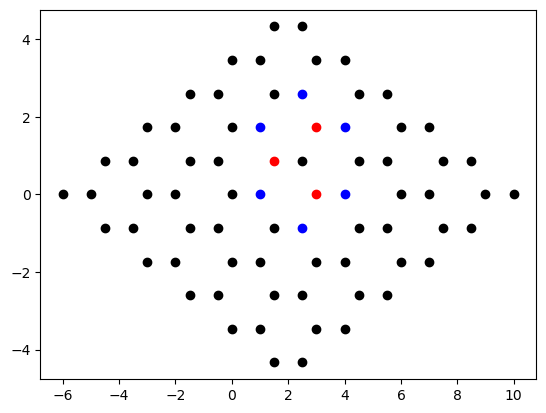

In [20]:
ind = 5

for n in [-1, 0, 1]:
    for m in [-1, 0, 1]:
        for R in R_list:
            pos_vec = R + n*A1+m*A2
            if np.abs(np.linalg.norm(pos_vec-R_list[ind]) -1)<1e-5:
                plt.scatter(pos_vec[0], pos_vec[1], c='red')
                continue
            elif np.abs(np.linalg.norm(pos_vec-R_list[ind]) -np.sqrt(3))<1e-5:
                plt.scatter(pos_vec[0], pos_vec[1], c='blue')
                continue
            plt.scatter(pos_vec[0], pos_vec[1], c='k')